In [1]:
import json

file_path = "watch-history.json"
file_data = open(file_path, 'r', encoding="UTF8").read()
history = json.loads(file_data, encoding="UTF8")

print(f'Loaded history data from {file_path}')
print(f'Found a total of {len(history)} videos watched')

Loaded history data from watch-history.json
Found a total of 19100 videos watched


In [2]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from os import path

In [19]:
from video_class import Video, VideoByChannel
from tqdm import tqdm

videos_watched = [Video(video_data) for video_data in tqdm(history)]

print(f'Parsed {len(videos_watched)} videos')

100%|████████████████████████████████████████████████████████████████████████████████████████| 19100/19100 [00:01<00:00, 12897.63it/s]

Parsed 19100 videos


In [4]:
import math

total_time = videos_watched[0].time - videos_watched[-1].time
print(f'Between the time you first watched a video and your last view, {total_time.days} days have passed')
hours = math.floor(total_time.seconds / 3600)
minutes = math.floor((total_time.seconds % 3600) / 60)
seconds = (total_time.seconds % 60)
print(f'{total_time.days} days, {hours} hours, {minutes:.0f} minutes and {seconds} seconds to be exact.')

Between the time you first watched a video and your last view, 1125 days have passed
1125 days, 5 hours, 53 minutes and 49 seconds to be exact.


In [17]:
print("First video you",videos_watched[-1].title)

First video you Watched https://www.youtube.com/watch?v=gI8JrMnG-_M


In [18]:
print(f'On average you watched {len(videos_watched)/total_time.days:.4f} videos per day')

On average you watched 16.9778 videos per day


In [148]:
from collections import Counter
from matplotlib import pyplot as plt

video_counter = Counter(videos_watched)
print(f'You watched a total of {len(video_counter)} unique videos')
print("Your top 20 most watched videos are:")
for video, amount in video_counter.most_common(20):
    print(f'    {amount} views: {video}')

You watched a total of 16628 unique videos
Your top 20 most watched videos are:
    317 views: Visited YouTube Music by @Unknown
    20 views: Watched Post Malone - White Iverson by @Post Malone
    20 views: Watched NAV, Metro Boomin - Call Me (Official Music Video) by @NAVVEVO
    19 views: Watched NAV - Myself (Official Music Video) by @NAVVEVO
    18 views: Watched Kovic - Drown (Lyrics) ♫ by @Wangdalf
    17 views: Watched Post Malone - Congratulations ft. Quavo by @PostMaloneVEVO
    16 views: Watched Lauv - Chasing Fire [Official Audio] by @Lauv
    15 views: Watched Nav - Up (Prod by Nav x Metro Boomin) by @NAV
    15 views: Watched Rae Sremmurd, Swae Lee, Slim Jxmmi - Powerglide ft. Juicy J (Official Video) by @RaeSremmurdVEVO
    13 views: Watched The Weeknd - Call Out My Name (Official Video) by @TheWeekndVEVO
    13 views: Watched Post Malone - Psycho ft. Ty Dolla $ign by @PostMaloneVEVO
    13 views: Watched Drake - God's Plan by @DrakeVEVO
    13 views: Watched Post Malon

In [162]:
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
tokenizer=RegexpTokenizer("[a-z]+")
title_video = list()
tokens_no = list()

In [163]:
for video in video_counter:
    title_video.append(video.title)

In [164]:
tokens=[tokenizer.tokenize(x.lower()) for  x in title_video]
tokens_no_stopwords=[token for x in tokens for token in x if token not in STOPWORDS]

In [165]:
for tok in tokens_no_stopwords:
    if (not (tok =="video" or tok == "watched" or tok == "youtube" or tok == "https" or tok =="V" or tok =="S" or tok =="t" or tok =="v" or tok =="s")):
        tokens_no.append(tok)

In [166]:
word_count=Counter(tokens_no)

In [169]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [170]:
youtube_coloring = np.array(Image.open(path.join(d, "YouTube.jpg")))

In [171]:
df=pd.DataFrame.from_records(word_count.most_common(200))
wc = WordCloud(width=3000, height=1700, background_color="white", mask=youtube_coloring, random_state=42)
wc.generate_from_frequencies(word_count)

In [172]:
image_colors = ImageColorGenerator(youtube_coloring)

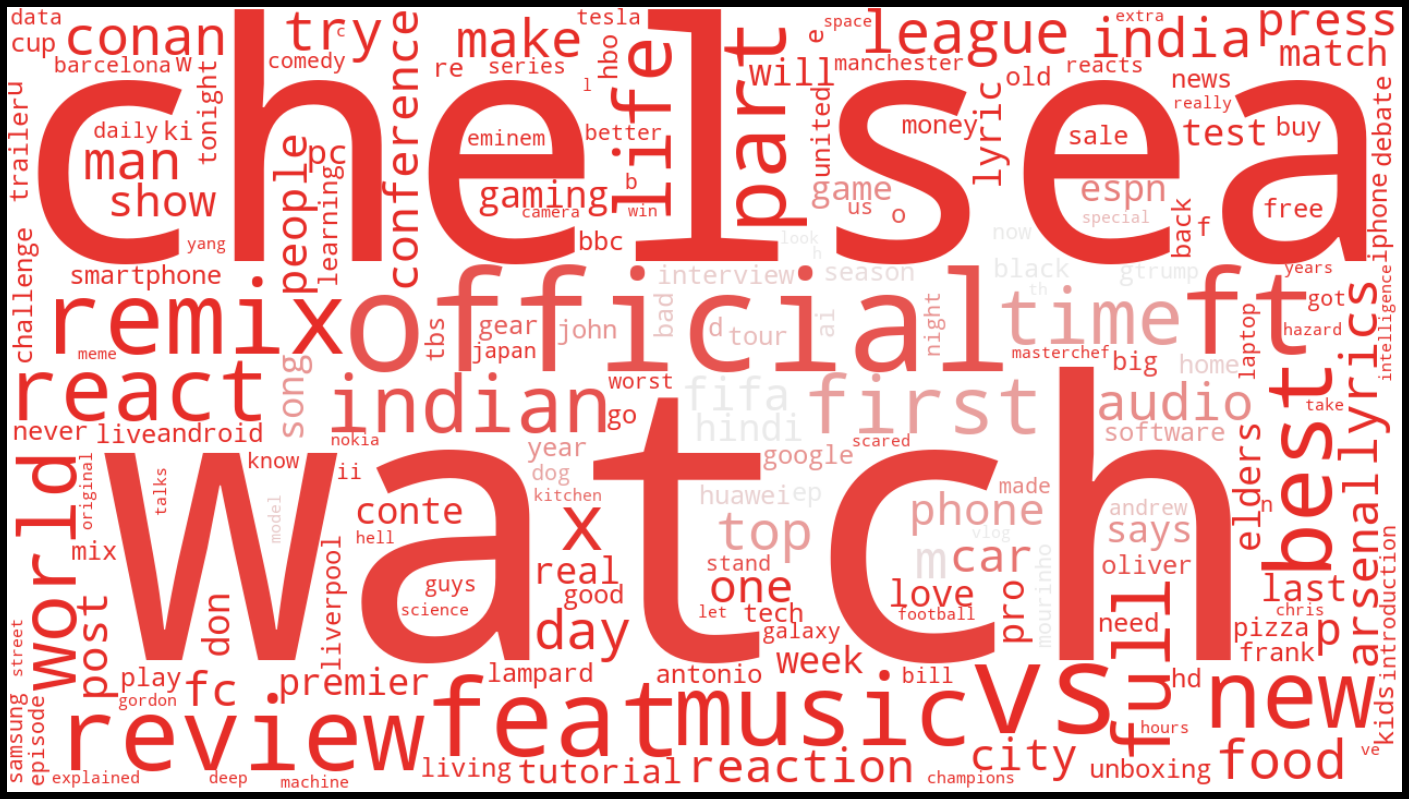

In [173]:
plt.figure(figsize=(25,15), facecolor='k')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

You really enjoy a total of 17 videos :


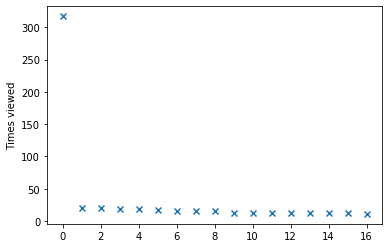

In [175]:
videos_i_enjoy = [
    (video, amount) for video, amount in video_counter.most_common()
    if amount > 10
]

print(f'You really enjoy a total of {len(videos_i_enjoy)} videos :')
plt.scatter(
    range(len(videos_i_enjoy)), 
    [amount for video, amount in videos_i_enjoy],
    marker="x"
)
plt.ylabel("Times viewed")
plt.show()

In [176]:
videos_watched_by_channel = [VideoByChannel(video_data) for video_data in tqdm(history)]
channel_counter = Counter(videos_watched_by_channel)
print(f'You watched a total of {len(channel_counter)} unique channels')
print("Your top 40 most watched channels are:")
for video, amount in channel_counter.most_common(40):
    print(f'    {amount} views: {video.channel_name}')

100%|█████████████████████████████████████████████████████████████████████████| 19100/19100 [00:01<00:00, 13677.68it/s]

You watched a total of 4803 unique channels
Your top 40 most watched channels are:
    446 views: MrSuicideSheep
    363 views: Linus Tech Tips
    311 views: BuzzFeedVideo
    300 views: Unknown
    249 views: 100PercentChelsea
    246 views: Proximity
    236 views: PewDiePie
    199 views: Chelsea Football Club
    187 views: Sky Sports Football
    184 views: FBE
    175 views: Trap City
    174 views: Mrwhosetheboss
    172 views: SomeOrdinaryGamers
    160 views: The Onion
    157 views: Team Coco
    152 views: TheEllenShow
    149 views: Kara and Nate
    144 views: HaytersTV
    133 views: ESPN UK
    133 views: The Vibe Guide
    131 views: ESPN FC
    124 views: Spinnin' Records
    114 views: Technical Guruji
    111 views: Unbox Therapy
    111 views: Austin Evans
    102 views: Scotty Kilmer
    100 views: Doug DeMuro
    88 views: Rap City
    85 views: Ben Mallah
    84 views: LastWeekTonight
    81 views: Top Gear
    81 views: Siraj Raval
    78 views: NewRetroWave
  

You watch 26 channels the most:


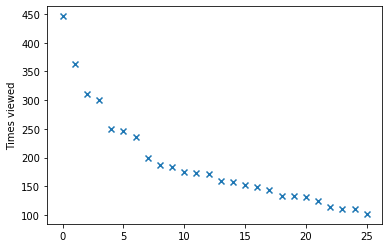

In [177]:
channels_i_enjoy = [
    (video, amount) for video, amount in channel_counter.most_common()
    if amount > 100
]

print(f'You watch {len(channels_i_enjoy)} channels the most:')
plt.scatter(
    range(len(channels_i_enjoy)),
    [amount for video, amount in channels_i_enjoy],
    marker="x"
)
plt.ylabel("Times viewed")
plt.show()

In [178]:
like_path = "likes.json"
like_data = open(file_path, 'r', encoding="UTF8").read()
likes = json.loads(file_data, encoding="UTF8")

print(f'Loaded history data from {file_path}')
print(f'Found a total of {len(history)} videos watched')

Loaded history data from watch-history.json
Found a total of 19100 videos watched
